<a href="https://colab.research.google.com/github/Tatianacp1/MineriaDatos/blob/main/Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARCIAL 2 MÉTODOS DE MINERÍA DE DATOS PHYTON.
# Tatiana Chavez Perez 
# CC. 1193120457
# Dataset Portugués - Clasificación

In [332]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [333]:
!pip install dfply

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [334]:
import pandas as pd
import numpy as np 
import seaborn 
import seaborn as sns
from dfply import *
%matplotlib inline
import matplotlib.pyplot as plt

datos = pd.read_csv('/content/drive/MyDrive/student-por.csv', 
                 sep = ';',
                 thousands=',', decimal='.',
                 skip_blank_lines=True,
                 low_memory = False,
                 dtype={
                     'Nit Entidad': str
                 })
datos.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Attributes for both student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira) <BR>
2 sex - student's sex (binary: "F" - female or "M" - male) <BR>
3 age - student's age (numeric: from 15 to 22) <BR> 
4 address - student's home address type (binary: "U" - urban or "R" - rural) <BR>
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3) <BR>
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart) <BR>
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) <BR>
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) <BR>
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")<BR>
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other") <BR>
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other") <BR>
12 guardian - student's guardian (nominal: "mother", "father" or "other") <BR>
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) <BR>
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) <BR>
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) <BR>
16 schoolsup - extra educational support (binary: yes or no) <BR> 
17 famsup - family educational support (binary: yes or no) <BR>
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) <BR>
19 activities - extra-curricular activities (binary: yes or no) <BR>
20 nursery - attended nursery school (binary: yes or no) <BR>
21 higher - wants to take higher education (binary: yes or no) <BR>
22 internet - Internet access at home (binary: yes or no) <BR>
23 romantic - with a romantic relationship (binary: yes or no) <BR>
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) <BR> 
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) <BR>
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) <BR>
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) <BR> 
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) <BR>
29 health - current health status (numeric: from 1 - very bad to 5 - very good) <BR> 
30 absences - number of school absences (numeric: from 0 to 93)<BR> 
These grades are related with the course subject, Math or Portuguese: <BR>
31 G1 - first period grade (numeric: from 0 to 20) <BR> 
31 G2 - second period grade (numeric: from 0 to 20) <BR>
32 G3 - final grade (numeric: from 0 to 20)


# 1.	Realice el proceso de verificación de calidad de datos y limpieza si es necesario realizarla. Mencione al final del punto, un resumen de los hallazgos encontrados.

In [335]:
print('Filas: ', datos.shape[0])
print('Columnas: ', datos.shape[1])

Filas:  649
Columnas:  33


In [336]:
datos.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [337]:
for col in datos.columns:
    num_missing = datos[col].isnull().sum()
    pct_missing = np.mean(datos[col].isnull())
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

school - 0.0% - 0
sex - 0.31% - 2
age - 0.0% - 0
address - 0.0% - 0
famsize - 0.31% - 2
Pstatus - 0.31% - 2
Medu - 0.0% - 0
Fedu - 0.0% - 0
Mjob - 0.0% - 0
Fjob - 0.15% - 1
reason - 0.0% - 0
guardian - 0.31% - 2
traveltime - 0.0% - 0
studytime - 0.0% - 0
failures - 0.0% - 0
schoolsup - 0.0% - 0
famsup - 0.31% - 2
paid - 0.0% - 0
activities - 0.0% - 0
nursery - 0.15% - 1
higher - 0.15% - 1
internet - 0.0% - 0
romantic - 0.0% - 0
famrel - 0.0% - 0
freetime - 0.0% - 0
goout - 0.0% - 0
Dalc - 0.0% - 0
Walc - 0.0% - 0
health - 0.0% - 0
absences - 0.0% - 0
G1 - 0.0% - 0
G2 - 0.0% - 0
G3 - 0.0% - 0


In [338]:
print('Antes de borrar registros: ',datos.shape)
for col in datos.columns:
    missing = datos[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        datos['{}_ismissing'.format(col)] = missing
ismissing_cols = [col for col in datos.columns if 'ismissing' in col]
datos['num_missing'] = datos[ismissing_cols].sum(axis=1)

Antes de borrar registros:  (649, 33)
created missing indicator for: sex
created missing indicator for: famsize
created missing indicator for: Pstatus
created missing indicator for: Fjob
created missing indicator for: guardian
created missing indicator for: famsup
created missing indicator for: nursery
created missing indicator for: higher


In [339]:
ind_missing = datos[datos['num_missing'] >= 1].index
df_less_missing_rows = datos.drop(ind_missing, axis=0)
df_less_missing_rows = df_less_missing_rows
print('Después de borrar registros: ',df_less_missing_rows.shape)

Después de borrar registros:  (636, 42)


In [340]:
datos2 = df_less_missing_rows
datos2[datos2.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G3,sex_ismissing,famsize_ismissing,Pstatus_ismissing,Fjob_ismissing,guardian_ismissing,famsup_ismissing,nursery_ismissing,higher_ismissing,num_missing


In [341]:
datos2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G3,sex_ismissing,famsize_ismissing,Pstatus_ismissing,Fjob_ismissing,guardian_ismissing,famsup_ismissing,nursery_ismissing,higher_ismissing,num_missing
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,11,False,False,False,False,False,False,False,False,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,11,False,False,False,False,False,False,False,False,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,12,False,False,False,False,False,False,False,False,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,14,False,False,False,False,False,False,False,False,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,13,False,False,False,False,False,False,False,False,0


Consistencia de los datos 

In [342]:
datos2.dtypes

school                object
sex                   object
age                    int64
address               object
famsize               object
Pstatus               object
Medu                   int64
Fedu                   int64
Mjob                  object
Fjob                  object
reason                object
guardian              object
traveltime             int64
studytime              int64
failures               int64
schoolsup             object
famsup                object
paid                  object
activities            object
nursery               object
higher                object
internet              object
romantic              object
famrel                 int64
freetime               int64
goout                  int64
Dalc                   int64
Walc                   int64
health                 int64
absences               int64
G1                     int64
G2                     int64
G3                     int64
sex_ismissing           bool
famsize_ismiss

In [343]:
datos.dropna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G3,sex_ismissing,famsize_ismissing,Pstatus_ismissing,Fjob_ismissing,guardian_ismissing,famsup_ismissing,nursery_ismissing,higher_ismissing,num_missing
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,11,False,False,False,False,False,False,False,False,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,11,False,False,False,False,False,False,False,False,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,12,False,False,False,False,False,False,False,False,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,14,False,False,False,False,False,False,False,False,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,13,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,10,False,False,False,False,False,False,False,False,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,16,False,False,False,False,False,False,False,False,0
646,MS,F,18,U,GT3,T,1,1,other,other,...,9,False,False,False,False,False,False,False,False,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,10,False,False,False,False,False,False,False,False,0


In [344]:
datos2 = datos.dropna()

In [345]:
datos2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,num_missing
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.0
mean,16.737421,2.514151,2.300314,1.572327,1.927673,0.221698,3.922956,3.188679,3.183962,1.507862,2.289308,3.536164,3.592767,11.418239,11.567610,11.944969,0.0
std,1.216131,1.135589,1.100923,0.752605,0.829261,0.596236,0.956721,1.053945,1.178199,0.929788,1.286372,1.449501,4.508177,2.795032,2.922649,3.368000,0.0
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,0.0
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,0.0
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,0.0
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,25.000000,19.000000,36.000000,0.0


In [346]:
(datos2['G1']>20).sum()

1

In [347]:
(datos2['G3']>20).sum()

1

In [348]:
datos2 = datos2.drop(datos2[datos2['G1']>20].index)
datos2 = datos2.drop(datos2[datos2['G3']>20].index)

In [349]:
datos2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,num_missing
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.0
mean,16.735016,2.512618,2.299685,1.572555,1.927445,0.222397,3.921136,3.189274,3.182965,1.507886,2.290221,3.531546,3.569401,11.400631,11.567823,11.900631,0.0
std,1.216970,1.135663,1.099375,0.753258,0.828656,0.597046,0.957268,1.054058,1.176908,0.930831,1.288299,1.449448,4.453276,2.745164,2.916311,3.230664,0.0
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,0.0
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,0.0
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,0.0
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,0.0


In [350]:
datos2.shape

(634, 42)

In [351]:
datos2['school'].value_counts()

GP    412
MS    222
Name: school, dtype: int64

In [352]:
datos2['sex'].value_counts()

F    375
M    259
Name: sex, dtype: int64

In [353]:
datos2['address'].value_counts()

U    438
R    196
Name: address, dtype: int64

In [354]:
datos2['famsize'].value_counts()

GT3    444
LE3    190
Name: famsize, dtype: int64

In [355]:
datos2['Pstatus'].value_counts()

T    556
A     77
B      1
Name: Pstatus, dtype: int64

In [356]:
datos2 = datos2.drop(datos2[datos2['Pstatus']=="B"].index)

In [357]:
datos2['Pstatus'].value_counts()

T    556
A     77
Name: Pstatus, dtype: int64

In [358]:
datos2['reason'].value_counts()

course        276
home          145
reputation    142
other          70
Name: reason, dtype: int64

In [359]:
datos2['schoolsup'].value_counts()

no     568
yes     63
Yes      1
No       1
Name: schoolsup, dtype: int64

In [360]:
datos2['schoolsup']=datos2['schoolsup'].map({'Yes':"yes", 'No':"no",'yes':"yes",'no':"no"})

In [361]:
datos2['schoolsup'].value_counts()

no     569
yes     64
Name: schoolsup, dtype: int64

In [362]:
datos2['famsup'].value_counts()

yes    390
no     243
Name: famsup, dtype: int64

In [363]:
datos2['paid'].value_counts()

no     593
yes     38
No       2
Name: paid, dtype: int64

In [364]:
datos2['paid']=datos2['paid'].map({'Yes':"yes", 'No':"no",'yes':"yes",'no':"no"})

In [365]:
datos2['paid'].value_counts()

no     595
yes     38
Name: paid, dtype: int64

In [366]:
datos2['nursery'].value_counts()

yes    507
no     125
No       1
Name: nursery, dtype: int64

In [367]:
datos2['nursery']=datos2['nursery'].map({'Yes':"yes", 'No':"no",'yes':"yes",'no':"no"})

In [368]:
datos2['nursery'].value_counts()

yes    507
no     126
Name: nursery, dtype: int64

In [369]:
datos2['activities'].value_counts()

no     322
yes    309
Yes      1
No       1
Name: activities, dtype: int64

In [370]:
datos2['activities']=datos2['activities'].map({'Yes':"yes", 'No':"no",'yes':"yes",'no':"no"})

In [371]:
datos2['activities'].value_counts()

no     323
yes    310
Name: activities, dtype: int64

In [372]:
datos2['higher'].value_counts()

yes    566
no      67
Name: higher, dtype: int64

In [373]:
datos2['internet'].value_counts()

yes    483
no     149
Yes      1
Name: internet, dtype: int64

In [374]:
datos2['internet']=datos2['internet'].map({'Yes':"yes", 'No':"no",'yes':"yes",'no':"no"})

In [375]:
datos2['internet'].value_counts()

yes    484
no     149
Name: internet, dtype: int64

In [376]:
datos2['romantic'].value_counts()

no     399
yes    233
No       1
Name: romantic, dtype: int64

In [377]:
datos2['romantic']=datos2['romantic'].map({'Yes':"yes", 'No':"no",'yes':"yes",'no':"no"})

In [378]:
datos2['romantic'].value_counts()

no     400
yes    233
Name: romantic, dtype: int64

In [379]:
datos2.dtypes

school                object
sex                   object
age                    int64
address               object
famsize               object
Pstatus               object
Medu                   int64
Fedu                   int64
Mjob                  object
Fjob                  object
reason                object
guardian              object
traveltime             int64
studytime              int64
failures               int64
schoolsup             object
famsup                object
paid                  object
activities            object
nursery               object
higher                object
internet              object
romantic              object
famrel                 int64
freetime               int64
goout                  int64
Dalc                   int64
Walc                   int64
health                 int64
absences               int64
G1                     int64
G2                     int64
G3                     int64
sex_ismissing           bool
famsize_ismiss

In [380]:
datos2['Medu'] = datos2['Medu'].astype('str')
datos2['Fedu'] = datos2['Fedu'].astype('str')
datos2['famrel'] = datos2['famrel'].astype('str')
datos2['freetime'] = datos2['freetime'].astype('str')
datos2['goout'] = datos2['goout'].astype('str')
datos2['Dalc'] = datos2['Dalc'].astype('str')
datos2['Walc'] = datos2['Walc'].astype('str')
datos2['health'] = datos2['health'].astype('str')

In [381]:
datos2.dtypes

school                object
sex                   object
age                    int64
address               object
famsize               object
Pstatus               object
Medu                  object
Fedu                  object
Mjob                  object
Fjob                  object
reason                object
guardian              object
traveltime             int64
studytime              int64
failures               int64
schoolsup             object
famsup                object
paid                  object
activities            object
nursery               object
higher                object
internet              object
romantic              object
famrel                object
freetime              object
goout                 object
Dalc                  object
Walc                  object
health                object
absences               int64
G1                     int64
G2                     int64
G3                     int64
sex_ismissing           bool
famsize_ismiss

In [382]:
datos2.shape

(633, 42)

In [383]:
649-636

13

De acuerdo al proceso de verificación de calidad de datos y 
limpieza se encontró que habías 13 filas con datos faltantes y
 que no encontraron duplicados en la base de datos, 
respecto a la consistencia de los datos se encontro que en algunas 
variables se presentaron inconsistencias en la codificación de las 
respuestas especifícamente en aquellas que tenían como respuesta "yes" 
y "no" con distintas formas de escritura como "Yes" o "No",
se codificaron para que las únicas respuestas fueran exactamente "yes" y
"no" esto sucedio en las variables schoolsup, paid, activities, internet,
romantic, adicionalmente se elimina el dato Pstatus correspondiente a la
respuesta B, ya que no es una opción de respuesta, por último se transformaron
aquellas variables que eran cuantitativas y su naturaleza 
correspondían a una variable categorica aquellas fueron Medu, Fedu, famreal,
freetime, goout, Dalc, Walc y health.
Al final de este proceso se termino con 633 filas de las 649 que se tenían
al inicio y un total de 42 variables.

# 2.	Realice un análisis exploratorio sobre las variables que considere son relevantes para el modelo, teniendo en cuenta el tipo de variable, es decir, si es cuantitativa o cualitativa/categórica. Mencione al final de punto las variables considera que son relevantes para el modelo y escoja 5 según dichos criterios.

In [384]:
(4.9*20)/10

9.8

Dado que el problema de referencia es de clasificación se opta por tener en cuenta la nota del primer período, la nota del segundo período y la nota final, tomando como referencia el promedio de estas 3 notas, teniendo en cuenta que se debe desarrollar un modelo de clasificación se encuentra por medio de la siguiente paginal la correspondiente normativa sobre el sistema de calificaciones: https://sede.um.es/sede/normativa/normativa-sobre-sistema-de-calificaciones-y-calculo-de-la-nota-media-de-los-expedientes-academicos/pdf/69.pdf. <BR> 
Se tiene El R.D. 1125/2003, de 5 de septiembre que estable que sobre una nota de 10, un estudiante con una nota menor o igual 4.9 se encuentra reprobado llevandolo esta nota a una escala de 20, se obtiene que los estudiantes deberán tener una nota mayor a 9.8 para aprobar sin embargo se decide aproximar la nota a 10. <BR>
A continuación se hace antes del desarrollo una pre-selección de variables que se piensan que se pueden utilizar en el modelo las cuales son age, traveltime,studytime, failures, sex, address, Pstatus, schoolsup, famsup,
paid, activities, internet, health y school para después seleccionar las 5 variables que se utilizaran en el modelo.

In [385]:
df = datos2.copy()
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G3,sex_ismissing,famsize_ismissing,Pstatus_ismissing,Fjob_ismissing,guardian_ismissing,famsup_ismissing,nursery_ismissing,higher_ismissing,num_missing
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,11,False,False,False,False,False,False,False,False,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,11,False,False,False,False,False,False,False,False,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,12,False,False,False,False,False,False,False,False,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,14,False,False,False,False,False,False,False,False,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,13,False,False,False,False,False,False,False,False,0


In [386]:
df.drop(['sex_ismissing','famsize_ismissing','Pstatus_ismissing',	'Fjob_ismissing',	'guardian_ismissing',	'famsup_ismissing',	'nursery_ismissing','higher_ismissing',	'num_missing'], axis=1, inplace=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [387]:
df = (df>>
 mutate(
   final = (X.G1 + X.G2 +X.G3)/3
 ))

In [388]:
df.loc[(df.final <10),'cat']='reprobado'
df.loc[(df.final >= 10),'cat']='aprobado'

In [389]:
df['cat'].value_counts()

aprobado     480
reprobado    153
Name: cat, dtype: int64

In [390]:
df['y'] = df['cat'].map({'aprobado':1, 'reprobado':0}).astype(np.int)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,final,cat,y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,4,0,11,11,7.333333,reprobado,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,2,9,11,11,10.333333,aprobado,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,6,12,13,12,12.333333,aprobado,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,0,14,14,14,14.000000,aprobado,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,0,11,13,13,12.333333,aprobado,1


In [391]:
df[['age','traveltime','studytime','failures','G1','G2','G3','final','y']].corr()

,age,traveltime,studytime,failures,G1,G2,G3,final,y
age,1.000000,0.028918,-0.002620,0.317999,-0.180125,-0.111157,-0.109794,-0.138038,-0.183090
traveltime,0.028918,1.000000,-0.054645,0.095397,-0.159192,-0.160969,-0.132541,-0.157007,-0.133606
studytime,-0.002620,-0.054645,1.000000,-0.145411,0.266900,0.246812,0.255303,0.267901,0.234496
failures,0.317999,0.095397,-0.145411,1.000000,-0.388372,-0.392817,-0.400175,-0.412279,-0.456911
G1,-0.180125,-0.159192,0.266900,-0.388372,1.000000,0.865050,0.825417,0.933435,0.690573
G2,-0.111157,-0.160969,0.246812,-0.392817,0.865050,1.000000,0.917479,0.971126,0.665330
G3,-0.109794,-0.132541,0.255303,-0.400175,0.825417,0.917479,1.000000,0.961387,0.672090
final,-0.138038,-0.157007,0.267901,-0.412279,0.933435,0.971126,0.961387,1.000000,0.706711
y,-0.183090,-0.133606,0.234496,-0.456911,0.690573,0.665330,0.672090,0.706711,1.000000


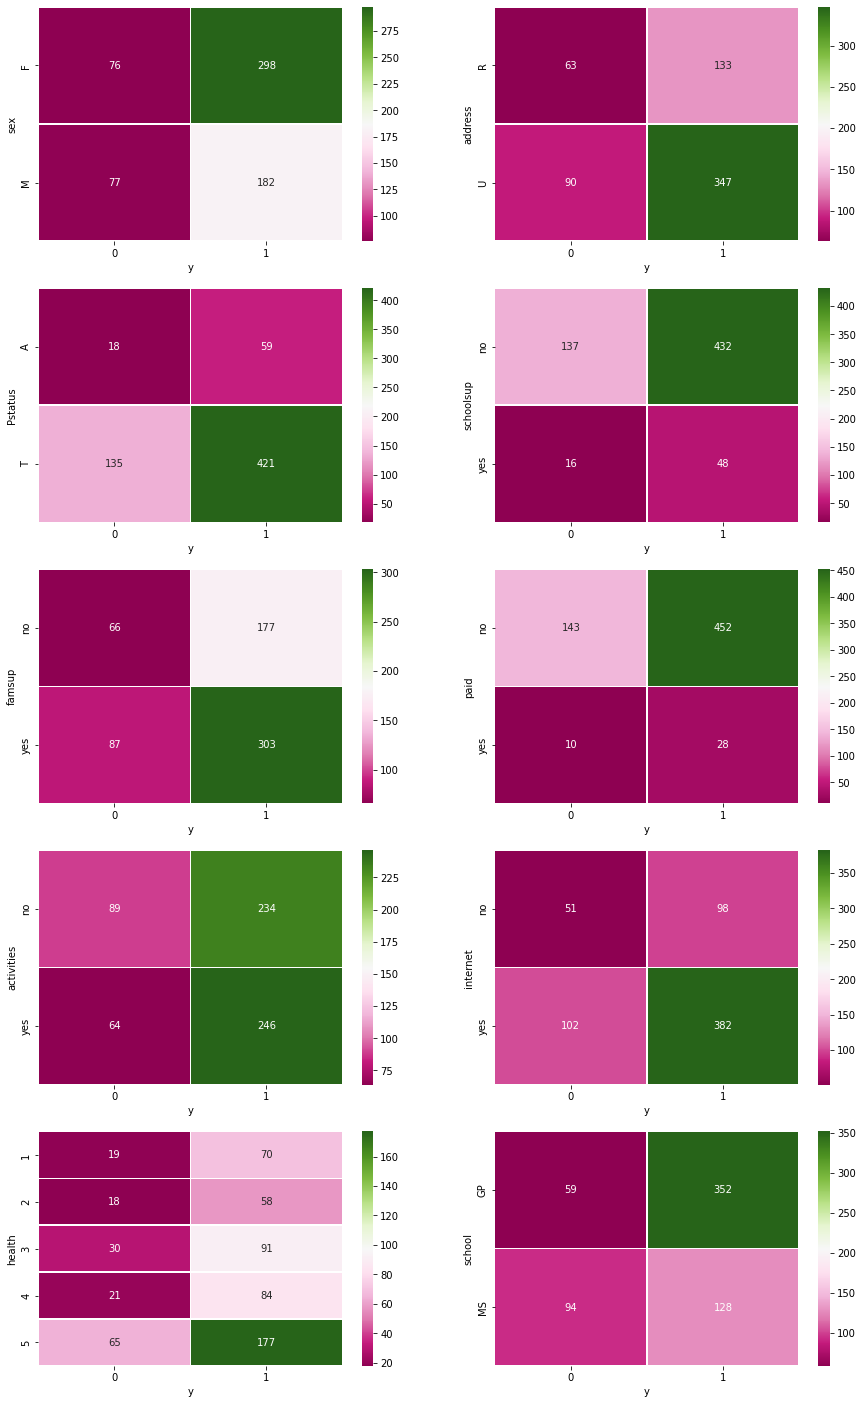

In [392]:
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
sns.heatmap(ax=axes[0, 0], data=pd.crosstab(df["sex"],df["y"]),annot=True, fmt="d",linewidths=.5, cmap="PiYG")
sns.heatmap(ax=axes[0, 1], data=pd.crosstab(df["address"],df["y"]),annot=True, fmt="d",linewidths=.5, cmap="PiYG")
sns.heatmap(ax=axes[1, 0], data=pd.crosstab(df["Pstatus"],df["y"]),annot=True, fmt="d",linewidths=.5, cmap="PiYG")
sns.heatmap(ax=axes[1, 1], data=pd.crosstab(df["schoolsup"],df["y"]),annot=True, fmt="d",linewidths=.5, cmap="PiYG")
sns.heatmap(ax=axes[2, 0], data=pd.crosstab(df["famsup"],df["y"]),annot=True, fmt="d",linewidths=.5, cmap="PiYG")
sns.heatmap(ax=axes[2, 1], data=pd.crosstab(df["paid"],df["y"]),annot=True, fmt="d",linewidths=.5, cmap="PiYG")
sns.heatmap(ax=axes[3, 0], data=pd.crosstab(df["activities"],df["y"]),annot=True, fmt="d",linewidths=.5, cmap="PiYG")
sns.heatmap(ax=axes[3, 1], data=pd.crosstab(df["internet"],df["y"]),annot=True, fmt="d",linewidths=.5, cmap="PiYG")
sns.heatmap(ax=axes[4, 0], data=pd.crosstab(df["health"],df["y"]),annot=True, fmt="d",linewidths=.5, cmap="PiYG")
sns.heatmap(ax=axes[4, 1], data=pd.crosstab(df["school"],df["y"]),annot=True, fmt="d",linewidths=.5, cmap="PiYG")

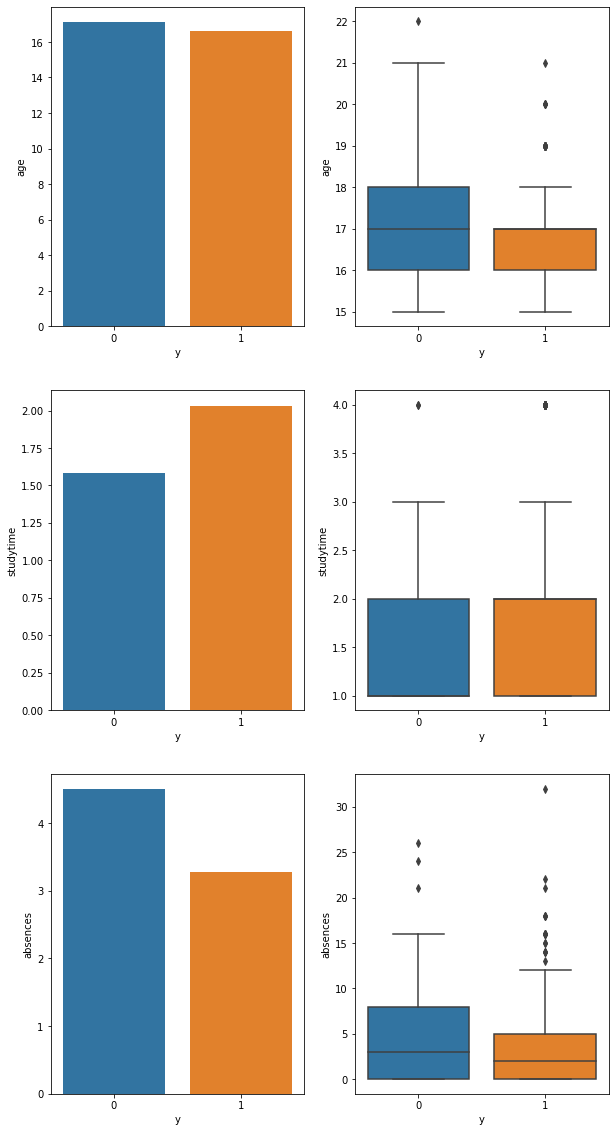

In [393]:
fig, axes = plt.subplots(3, 2, figsize=(10, 20))
sns.barplot(ax=axes[0, 0], data = df,estimator = mean,x = "y",y = "age",ci = None)
seaborn.boxplot(ax=axes[0, 1], data = df,x = "y",y = "age")
sns.barplot(ax=axes[1, 0], data = df,estimator = mean,x = "y",y = "studytime",ci = None)
seaborn.boxplot(ax=axes[1, 1], data = df,x = "y",y = "studytime")
sns.barplot(ax=axes[2, 0], data = df,estimator = mean,x = "y",y = "absences",ci = None)
seaborn.boxplot(ax=axes[2, 1], data = df,x = "y",y = "absences")

In [394]:
df2 = df[['sex','age','paid','internet','school','y']]
df2.head()

,sex,age,paid,internet,school,y
0,F,18,no,no,GP,0
1,F,17,no,yes,GP,1
2,F,15,no,yes,GP,1
3,F,15,no,yes,GP,1
4,F,16,no,no,GP,1


In [395]:
df2 = pd.get_dummies(df2)
df2

,age,y,sex_F,sex_M,paid_no,paid_yes,internet_no,internet_yes,school_GP,school_MS
0,18,0,1,0,1,0,1,0,1,0
1,17,1,1,0,1,0,0,1,1,0
2,15,1,1,0,1,0,0,1,1,0
3,15,1,1,0,1,0,0,1,1,0
4,16,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
644,19,1,1,0,1,0,0,1,0,1
645,18,1,1,0,1,0,0,1,0,1
646,18,1,1,0,1,0,1,0,0,1
647,17,1,0,1,1,0,0,1,0,1


In [396]:
df2 = df2.drop(['sex_M','paid_yes','internet_yes','school_GP'],axis=1)
df2.head()

,age,y,sex_F,paid_no,internet_no,school_MS
0,18,0,1,1,1,0
1,17,1,1,1,0,0
2,15,1,1,1,0,0
3,15,1,1,1,0,0
4,16,1,1,1,1,0


De acuerdo a la pre-selección de las variables mencionadas al inicio de este segundo punto las cuales eran age, traveltime, studytime, failures, sex, address, Pstatus, schoolsup, famsup, paid, activities, internet, health y school teniendo en cuentas las correlaciones para las variables cuantitativas, los diagramas BoxPlot y mapas de calor para las variables categóricas se tiene que visualmente las variables que tiene una diferencia significativa con respecto a la variable respuesta son age, sex, paid, internet y school, dado que las variables categóricas no deben ingresarse en el modelo con esta naturaleza cualitativa, se transforman en variables dummy tomando como referencia el sexo femenino, los estudiantes que no pagaron clases extras, los estudiantes que no tiene internet en su casa y los estudiantes que pertenecen al colegio MS 

# 3.	Seleccione un algoritmo de regresión clasificación según le corresponda (lineal, logístico o lasso o ridge) teniendo en cuenta lo siguiente:
-	Estime el modelo utilizando las variables previamente seleccionadas utilizando todo el dataset. Varíe 2 de los parámetros del modelo en 3 posibles valores para cada uno.


In [397]:
df_1 = df2.copy()

In [398]:
X = df_1.drop(['y'],axis=1)
y = df_1.y
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

c = [0.1,1e5,2e11]
t = [0.001,0.1,0.8]

In [399]:
logreg1 = LogisticRegression(C=c[0],tol=t[0],multi_class='auto',solver='liblinear')
logreg1.fit(X_scaled, y)
df_1['y_pred1'] = logreg1.predict(X_scaled)
print("Variable real modelo 1:")
print(np.array(np.unique(df_1['y'], return_counts=True)).T)
print("Variable predicha modelo 1")
print(np.array(np.unique(df_1['y_pred1'], return_counts=True)).T)

logreg2 = LogisticRegression(C=c[0],tol=t[1],multi_class='auto',solver='liblinear')
logreg2.fit(X_scaled, y)
df_1['y_pred2'] = logreg2.predict(X_scaled)
print("Variable real modelo 2:")
print(np.array(np.unique(df_1['y'], return_counts=True)).T)
print("Variable predicha modelo 2 :" )
print(np.array(np.unique(df_1['y_pred2'], return_counts=True)).T)

logreg3 = LogisticRegression(C=c[0],tol=t[2],multi_class='auto',solver='liblinear')
logreg3.fit(X_scaled, y)
df_1['y_pred3'] = logreg3.predict(X_scaled)
print("Variable real modelo 3:")
print(np.array(np.unique(df_1['y'], return_counts=True)).T)
print("Variable predicha modelo 3 :" )
print(np.array(np.unique(df_1['y_pred3'], return_counts=True)).T)

logreg4 = LogisticRegression(C=c[1],tol=t[0],multi_class='auto',solver='liblinear')
logreg4.fit(X_scaled, y)
df_1['y_pred4'] = logreg4.predict(X_scaled)
print("Variable real modelo 4:")
print(np.array(np.unique(df_1['y'], return_counts=True)).T)
print("Variable predicha modelo 4:" )
print(np.array(np.unique(df_1['y_pred4'], return_counts=True)).T)

logreg5 = LogisticRegression(C=c[1],tol=t[1],multi_class='auto',solver='liblinear')
logreg5.fit(X_scaled, y)
df_1['y_pred5'] = logreg5.predict(X_scaled)
print("Variable real modelo 5:")
print(np.array(np.unique(df_1['y'], return_counts=True)).T)
print("Variable predicha modelo 5 :" )
print(np.array(np.unique(df_1['y_pred5'], return_counts=True)).T)

logreg6 = LogisticRegression(C=c[1],tol=t[2],multi_class='auto',solver='liblinear')
logreg6.fit(X_scaled, y)
df_1['y_pred6'] = logreg6.predict(X_scaled)
print("Variable real modelo 6:")
print(np.array(np.unique(df_1['y'], return_counts=True)).T)
print("Variable predicha modelo 6 :" )
print(np.array(np.unique(df_1['y_pred6'], return_counts=True)).T)

logreg7 = LogisticRegression(C=c[2],tol=t[0],multi_class='auto',solver='liblinear')
logreg7.fit(X_scaled, y)
df_1['y_pred7'] = logreg7.predict(X_scaled)
print("Variable real modelo 7:")
print(np.array(np.unique(df_1['y'], return_counts=True)).T)
print("Variable predicha modelo 7 :" )
print(np.array(np.unique(df_1['y_pred7'], return_counts=True)).T)

logreg8 = LogisticRegression(C=c[2],tol=t[1],multi_class='auto',solver='liblinear')
logreg8.fit(X_scaled, y)
df_1['y_pred8'] = logreg8.predict(X_scaled)
print("Variable real modelo 8:")
print(np.array(np.unique(df_1['y'], return_counts=True)).T)
print("Variable predicha modelo 8:" )
print(np.array(np.unique(df_1['y_pred8'], return_counts=True)).T)

logreg9 = LogisticRegression(C=c[2],tol=t[2],multi_class='auto',solver='liblinear')
logreg9.fit(X_scaled, y)
df_1['y_pred9'] = logreg9.predict(X_scaled)
print("Variable real modelo 9:")
print(np.array(np.unique(df_1['y'], return_counts=True)).T)
print("Variable predicha modelo 9:" )
print(np.array(np.unique(df_1['y_pred9'], return_counts=True)).T)


Variable real modelo 1:
[[  0 153]
 [  1 480]]
Variable predicha modelo 1
[[  0  75]
 [  1 558]]
Variable real modelo 2:
[[  0 153]
 [  1 480]]
Variable predicha modelo 2 :
[[  0  63]
 [  1 570]]
Variable real modelo 3:
[[  0 153]
 [  1 480]]
Variable predicha modelo 3 :
[[  0  39]
 [  1 594]]
Variable real modelo 4:
[[  0 153]
 [  1 480]]
Variable predicha modelo 4:
[[  0  81]
 [  1 552]]
Variable real modelo 5:
[[  0 153]
 [  1 480]]
Variable predicha modelo 5 :
[[  0  76]
 [  1 557]]
Variable real modelo 6:
[[  0 153]
 [  1 480]]
Variable predicha modelo 6 :
[[  0  39]
 [  1 594]]
Variable real modelo 7:
[[  0 153]
 [  1 480]]
Variable predicha modelo 7 :
[[  0  81]
 [  1 552]]
Variable real modelo 8:
[[  0 153]
 [  1 480]]
Variable predicha modelo 8:
[[  0  76]
 [  1 557]]
Variable real modelo 9:
[[  0 153]
 [  1 480]]
Variable predicha modelo 9:
[[  0  39]
 [  1 594]]


In [400]:
df_1=df_1.drop(['y_pred1','y_pred2','y_pred3','y_pred4','y_pred5','y_pred6','y_pred7','y_pred8','y_pred9'],axis=1)

In [401]:
df_1

,age,y,sex_F,paid_no,internet_no,school_MS
0,18,0,1,1,1,0
1,17,1,1,1,0,0
2,15,1,1,1,0,0
3,15,1,1,1,0,0
4,16,1,1,1,1,0
...,...,...,...,...,...,...
644,19,1,1,1,0,1
645,18,1,1,1,0,1
646,18,1,1,1,1,1
647,17,1,0,1,0,1


-	Estime el modelo utilizando únicamente una partición de entrenamiento (80%) and test (20%). Varíe 2 de los parámetros del modelo en 3 posibles valores para cada uno.

In [402]:
X = df_1.drop(['y'],axis=1)
y = df_1.y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scaler = StandardScaler()
X_train = X_train.astype(float)
X_test = X_test.astype(float)
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

c = [0.1,1e5,2e11]
t = [0.001,0.1,0.8]

In [403]:
logreg1 = LogisticRegression(C=c[0],tol=t[0],multi_class='auto',solver='liblinear')
logreg1.fit(X_scaled, y_train)
y_pred1 = logreg1.predict(X_scaled)
print("Variable real modelo 1:")
print(np.array(np.unique(y_train, return_counts=True)).T)
print("Variable predicha modelo 1")
print(np.array(np.unique(y_pred1, return_counts=True)).T)

logreg2 = LogisticRegression(C=c[0],tol=t[1],multi_class='auto',solver='liblinear')
logreg2.fit(X_scaled, y_train)
y_pred2 = logreg2.predict(X_scaled)
print("Variable real modelo 2:")
print(np.array(np.unique(y_train, return_counts=True)).T)
print("Variable predicha modelo 2 :" )
print(np.array(np.unique(y_pred2, return_counts=True)).T)

logreg3 = LogisticRegression(C=c[0],tol=t[2],multi_class='auto',solver='liblinear')
logreg3.fit(X_scaled, y_train)
y_pred3 = logreg3.predict(X_scaled)
print("Variable real modelo 3:")
print(np.array(np.unique(y_train, return_counts=True)).T)
print("Variable predicha modelo 3 :" )
print(np.array(np.unique(y_pred3, return_counts=True)).T)

logreg4 = LogisticRegression(C=c[1],tol=t[0],multi_class='auto',solver='liblinear')
logreg4.fit(X_scaled, y_train)
y_pred4 = logreg4.predict(X_scaled)
print("Variable real modelo 4:")
print(np.array(np.unique(y_train, return_counts=True)).T)
print("Variable predicha modelo 4:" )
print(np.array(np.unique(y_pred4, return_counts=True)).T)

logreg5 = LogisticRegression(C=c[1],tol=t[1],multi_class='auto',solver='liblinear')
logreg5.fit(X_scaled, y_train)
y_pred5 = logreg5.predict(X_scaled)
print("Variable real modelo 5:")
print(np.array(np.unique(y_train, return_counts=True)).T)
print("Variable predicha modelo 5 :" )
print(np.array(np.unique(y_pred5, return_counts=True)).T)

logreg6 = LogisticRegression(C=c[1],tol=t[2],multi_class='auto',solver='liblinear')
logreg6.fit(X_scaled, y_train)
y_pred6 = logreg6.predict(X_scaled)
print("Variable real modelo 6:")
print(np.array(np.unique(y_train, return_counts=True)).T)
print("Variable predicha modelo 6 :" )
print(np.array(np.unique(y_pred6, return_counts=True)).T)

logreg7 = LogisticRegression(C=c[2],tol=t[0],multi_class='auto',solver='liblinear')
logreg7.fit(X_scaled, y_train)
y_pred7 = logreg7.predict(X_scaled)
print("Variable real modelo 7:")
print(np.array(np.unique(y_train, return_counts=True)).T)
print("Variable predicha modelo 7 :" )
print(np.array(np.unique(y_pred7, return_counts=True)).T)

logreg8 = LogisticRegression(C=c[2],tol=t[1],multi_class='auto',solver='liblinear')
logreg8.fit(X_scaled, y_train)
y_pred8 = logreg8.predict(X_scaled)
print("Variable real modelo 8:")
print(np.array(np.unique(y_train, return_counts=True)).T)
print("Variable predicha modelo 8:" )
print(np.array(np.unique(y_pred8, return_counts=True)).T)

logreg9 = LogisticRegression(C=c[2],tol=t[2],multi_class='auto',solver='liblinear')
logreg9.fit(X_scaled, y_train)
y_pred9 = logreg9.predict(X_scaled)
print("Variable real modelo 9:")
print(np.array(np.unique(y_train, return_counts=True)).T)
print("Variable predicha modelo 9:" )
print(np.array(np.unique(y_pred9, return_counts=True)).T)


Variable real modelo 1:
[[  0 118]
 [  1 388]]
Variable predicha modelo 1
[[  0  25]
 [  1 481]]
Variable real modelo 2:
[[  0 118]
 [  1 388]]
Variable predicha modelo 2 :
[[  0  25]
 [  1 481]]
Variable real modelo 3:
[[  0 118]
 [  1 388]]
Variable predicha modelo 3 :
[[  0  18]
 [  1 488]]
Variable real modelo 4:
[[  0 118]
 [  1 388]]
Variable predicha modelo 4:
[[  0  25]
 [  1 481]]
Variable real modelo 5:
[[  0 118]
 [  1 388]]
Variable predicha modelo 5 :
[[  0  25]
 [  1 481]]
Variable real modelo 6:
[[  0 118]
 [  1 388]]
Variable predicha modelo 6 :
[[  0  18]
 [  1 488]]
Variable real modelo 7:
[[  0 118]
 [  1 388]]
Variable predicha modelo 7 :
[[  0  25]
 [  1 481]]
Variable real modelo 8:
[[  0 118]
 [  1 388]]
Variable predicha modelo 8:
[[  0  25]
 [  1 481]]
Variable real modelo 9:
[[  0 118]
 [  1 388]]
Variable predicha modelo 9:
[[  0  18]
 [  1 488]]


-	Estime el modelo, utilizando la partición anterior, pero en la partición de entrenamiento utilizar un K Fold Cross Validation (k=5 y k=10).

k = 5

In [404]:
from sklearn.linear_model import LogisticRegression
m3 = LogisticRegression(solver='liblinear',C=1e9)
m3.fit(X_train, y_train)
# Crear el metodo K = 5
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=666, shuffle=True)
scores = cross_val_score(m3, X_train, y_train,cv=cv, n_jobs=-1,scoring="precision")
print(np.mean(scores))
y_predk5 = m3.predict(X_train)

0.7804997244396941


In [405]:
print("Variable real modelo 9:")
print(np.array(np.unique(y_train, return_counts=True)).T)
print("Variable predicha modelo 9:" )
print(np.array(np.unique(y_predk5, return_counts=True)).T)

Variable real modelo 9:
[[  0 118]
 [  1 388]]
Variable predicha modelo 9:
[[  0  25]
 [  1 481]]


In [406]:
y_pred2 = m3.predict(X_test)
import numpy as np
print("Precisión de test con k = 5: ", metrics.accuracy_score(y_test, y_pred2))
print("Recall de test con k = 5: ", metrics.recall_score(y_test, y_pred2))

Precisión de test con k = 5:  0.7874015748031497
Recall de test con k = 5:  0.9782608695652174


k = 10

In [407]:
from sklearn.linear_model import LogisticRegression
m4 = LogisticRegression(solver='liblinear',C=1e9)
m4.fit(X_train, y_train)
# Crear el metodo K = 10
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score
cv1 = KFold(n_splits=10, random_state=666, shuffle=True)
scores2 = cross_val_score(m4, X_train, y_train,cv=cv1, n_jobs=-1,scoring="precision")
print(np.mean(scores2))
y_predk10 = m4.predict(X_train)

0.7832181768791389


In [408]:
print("Variable real modelo 9:")
print(np.array(np.unique(y_train, return_counts=True)).T)
print("Variable predicha modelo 9:" )
print(np.array(np.unique(y_predk10, return_counts=True)).T)

Variable real modelo 9:
[[  0 118]
 [  1 388]]
Variable predicha modelo 9:
[[  0  25]
 [  1 481]]


In [409]:
y_pred3 = m4.predict(X_test)
print("Precisión de test con k = 10: ", metrics.accuracy_score(y_test, y_pred3))
print("Recall de test con k = 10: ", metrics.recall_score(y_test, y_pred3))

Precisión de test con k = 10:  0.7874015748031497
Recall de test con k = 10:  0.9782608695652174


- Para cada uno de los anteriores puntos, seleccionar dos métricas y evaluar los modelos teniendo en cuenta que el resultado a presentar y analizar será en la partición de test.

**Métricas**

**Primera parte**

In [410]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
c = [0.1,1e4,2e11]
t = [0.001,0.1,0.8]
for i in c:
  for j in t:
    rf_reg = LogisticRegression(C=i, tol=j,multi_class='auto',solver='liblinear')
    rf_reg.fit(X_scaled, y)
    y_pred = rf_reg.predict(X_scaled)
    print(f'C = {i}, tolerancia = {j}')
    print(f'Precisión: {metrics.precision_score(y, y_pred).round(5)}')
    print(f'Exactitud: {metrics.accuracy_score(y, y_pred).round(5)}')

C = 0.1, tolerancia = 0.001
Precisión: 0.79928
Exactitud: 0.76935
C = 0.1, tolerancia = 0.1
Precisión: 0.79123
Exactitud: 0.76619
C = 0.1, tolerancia = 0.8
Precisión: 0.78283
Exactitud: 0.77251
C = 10000.0, tolerancia = 0.001
Precisión: 0.80435
Exactitud: 0.77251
C = 10000.0, tolerancia = 0.1
Precisión: 0.80072
Exactitud: 0.77093
C = 10000.0, tolerancia = 0.8
Precisión: 0.78283
Exactitud: 0.77251
C = 200000000000.0, tolerancia = 0.001
Precisión: 0.80435
Exactitud: 0.77251
C = 200000000000.0, tolerancia = 0.1
Precisión: 0.80072
Exactitud: 0.77093
C = 200000000000.0, tolerancia = 0.8
Precisión: 0.78283
Exactitud: 0.77251


**Segunda parte**

In [411]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = X_train.astype(float)
X_test = X_test.astype(float)
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

c_est = [0.1,1e4,2e11]
t_est = [0.001,0.1,0.8]
for i in c_est:
  for j in t_est:
    rf_reg = LogisticRegression(C=i, tol=j,multi_class='auto',solver='liblinear')
    rf_reg.fit(X_scaled, y_train)
    y_pred = rf_reg.predict(X_test_scaled)
    print(f'C = {i}, tolerancia = {j}')
    print(f'Precisión: {metrics.precision_score(y_test, y_pred).round(7)}')
    print(f'Exactitud: {metrics.accuracy_score(y_test, y_pred).round(7)}')

C = 0.1, tolerancia = 0.001
Precisión: 0.7826087
Exactitud: 0.7874016
C = 0.1, tolerancia = 0.1
Precisión: 0.7826087
Exactitud: 0.7874016
C = 0.1, tolerancia = 0.8
Precisión: 0.7479675
Exactitud: 0.7559055
C = 10000.0, tolerancia = 0.001
Precisión: 0.7826087
Exactitud: 0.7874016
C = 10000.0, tolerancia = 0.1
Precisión: 0.7826087
Exactitud: 0.7874016
C = 10000.0, tolerancia = 0.8
Precisión: 0.7479675
Exactitud: 0.7559055
C = 200000000000.0, tolerancia = 0.001
Precisión: 0.7826087
Exactitud: 0.7874016
C = 200000000000.0, tolerancia = 0.1
Precisión: 0.7826087
Exactitud: 0.7874016
C = 200000000000.0, tolerancia = 0.8
Precisión: 0.7479675
Exactitud: 0.7559055


In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = X_train.astype(float)
X_test = X_test.astype(float)
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

c_est = [0.1,1e4,2e11]
t_est = [0.001,0.1,0.8]
for i in c_est:
  for j in t_est:
    rf_reg = LogisticRegression(C=i, tol=j, penalty = "l1",multi_class='auto',solver='liblinear')
    rf_reg.fit(X_scaled, y_train)
    y_pred = rf_reg.predict(X_test_scaled)
    print(f'C = {i}, tolerancia = {j}')
    print(f'Precisión: {metrics.precision_score(y_test, y_pred).round(7)}')
    print(f'Exactitud: {metrics.accuracy_score(y_test, y_pred).round(7)}')

C = 0.1, tolerancia = 0.001
Precisión: 0.736
Exactitud: 0.7401575
C = 0.1, tolerancia = 0.1
Precisión: 0.736
Exactitud: 0.7401575
C = 0.1, tolerancia = 0.8
Precisión: 0.7301587
Exactitud: 0.7322835
C = 10000.0, tolerancia = 0.001
Precisión: 0.7826087
Exactitud: 0.7874016
C = 10000.0, tolerancia = 0.1
Precisión: 0.8018018
Exactitud: 0.8031496
C = 10000.0, tolerancia = 0.8
Precisión: 0.7826087
Exactitud: 0.7874016
C = 200000000000.0, tolerancia = 0.001
Precisión: 0.7826087
Exactitud: 0.7874016
C = 200000000000.0, tolerancia = 0.1
Precisión: 0.7946429
Exactitud: 0.7952756
C = 200000000000.0, tolerancia = 0.8
Precisión: 0.7647059
Exactitud: 0.7716535


**Tercera parte**

In [413]:
y_pred2 = m3.predict(X_test)
import numpy as np
print("Precisión de entrenamiento con k = 5: " ,np.mean(cross_val_score(m3, X_train, y_train,cv=cv, n_jobs=-1,scoring="precision")))
print("Exactitud de entrenamiento con k = 5: " ,np.mean(cross_val_score(m3, X_train, y_train,cv=cv, n_jobs=-1,scoring="accuracy")))
print("Precisión de test con k = 5: ", metrics.precision_score(y_test, y_pred2))
print("Exactitud de test con k = 5: ", metrics.accuracy_score(y_test, y_pred2))

Precisión de entrenamiento con k = 5:  0.7804997244396941
Exactitud de entrenamiento con k = 5:  0.7530770724131235
Precisión de test con k = 5:  0.782608695652174
Exactitud de test con k = 5:  0.7874015748031497


In [414]:
y_pred3 = m4.predict(X_test)
print("Precisión de entrenamiento con k = 10: " ,np.mean(cross_val_score(m4, X_train, y_train,cv=cv1, n_jobs=-1,scoring="precision")))
print("Exactitud de entrenamiento con k = 10:  " ,np.mean(cross_val_score(m4, X_train, y_train,cv=cv1, n_jobs=-1,scoring="accuracy")))
print("Precisión de test con k = 10: ", metrics.precision_score(y_test, y_pred3))
print("Exactitud de test con k = 10: ", metrics.accuracy_score(y_test, y_pred3))

Precisión de entrenamiento con k = 10:  0.7832181768791389
Exactitud de entrenamiento con k = 10:   0.7594901960784314
Precisión de test con k = 10:  0.782608695652174
Exactitud de test con k = 10:  0.7874015748031497


#4. Analice
- ¿Cuál fue el mejor modelo según las métricas anteriormente mencionadas? <BR>


**Dadas las métricas se encontró que el mejor modelo es un modelo de clasificación logístico regularizado.**

-	De la respuesta anterior ¿Qué valores de los parámetros se seleccionaron para lograr dicho resultado?


**Los valores de los parámetros escogido para lograr dicho resultado fueron un C = 10000, tolerancia = 0.8 y una penalización con lasso.**


-	Analice los coeficientes del modelo final seleccionado


In [415]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = X_train.astype(float)
X_test = X_test.astype(float)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [416]:
logreg = LogisticRegression(C=10000, penalty='l1',tol=0.8,solver='liblinear',multi_class='auto')
logreg.fit(X_train_scaled, y_train)


LogisticRegression(C=10000, penalty='l1', solver='liblinear', tol=0.8)

In [417]:
print(logreg.coef_)
print(logreg.intercept_)

[[-0.22288281  0.11946117 -0.02463228 -0.08718224 -0.53214912]]
[1.06719289]


In [418]:
coef= pd.DataFrame( {'variable': X_train.columns,'coeficientes': logreg.coef_.flatten()})


In [419]:
intercepto = pd.DataFrame({'variable': "intercepto",'coeficientes': logreg.intercept_})

In [420]:
coeficientes = intercepto.append(coef)

In [421]:
coeficientes

,variable,coeficientes
0,intercepto,1.067193
0,age,-0.222883
1,sex_F,0.119461
2,paid_no,-0.024632
3,internet_no,-0.087182
4,school_MS,-0.532149


Se tiene un intercepto de 1.06719289, para los betas de acuerdo a la primera variable tal como se presenta en la tabla es edad se tiene que cuando la edad aumenta en una unidad, se estima que las probabilidades logarítmicas de que los estudiantes aprueben el examen promedio disminuyan en 0.1957 manteniendo las demás variables constantes. <BR> Para la variable sexo se estima que cuando el estudiante sea femenino la probabilidad de que apruebe el examen en comparación al sexo masculino aumente en 0.153499. <BR> Para la variable paid que se refiere a que si pago o no clases extra dentro de la materia del curso de portugués se estima que cuando el estudiante no paga clases extras la probabilidad logarítmica de que apruebe el examen en comparación a que si pague clases extra disminuye en 0.021960. <BR> Para la variable internet que se refiere a que si tiene o no internet en casa, se estima que cuando el estudiante no tiene internet la probabilidad logarítmica de que apruebe el examen en comparación a que si tenga en internet en casa disminuye en 0.087 y respecto a la última que hace referencia al colegio que pertenece el estudiante se estima que cuando está en el colegio Mousinho da Silveira la probabilidad logarítmica de que pase el examen disminuye en 0.539595 en comparación a Gabriel Pereira.